## Jilian Dickson 
## D206- PA
## WGU- Dr. Eric Straw
## July 8, 2022

## Part 1- A: Research question: Taking into account patient data provided, what are the relationships between the given factors of children, age, and being overweight?

## First step is to import packages to be used in PA

In [2]:
install.packages('tidyverse')

also installing the dependencies ‘rematch’, ‘gargle’, ‘cellranger’, ‘ids’, ‘googledrive’, ‘googlesheets4’, ‘reprex’





The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpQAzaCy/downloaded_packages


In [3]:
install.packages('dplyr')


The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpQAzaCy/downloaded_packages


In [4]:
install.packages('ggplot2')


The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpQAzaCy/downloaded_packages


In [7]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [8]:
library(dplyr)


In [9]:
library(ggplot2)

In [11]:
library(vroom)

## The next step is load in the data. I chose the medical dataset. 

In [18]:
medical<- suppressMessages(read_csv('medical_raw_data.csv', show_col_types = FALSE))
options(warn=-1)

In [19]:
colnames(medical)

[1] "...1"               "CaseOrder"          "Customer_id"       
 [4] "Interaction"        "UID"                "City"              
 [7] "State"              "County"             "Zip"               
[10] "Lat"                "Lng"                "Population"        
[13] "Area"               "Timezone"           "Job"               
[16] "Children"           "Age"                "Education"         
[19] "Employment"         "Income"             "Marital"           
[22] "Gender"             "ReAdmis"            "VitD_levels"       
[25] "Doc_visits"         "Full_meals_eaten"   "VitD_supp"         
[28] "Soft_drink"         "Initial_admin"      "HighBlood"         
[31] "Stroke"             "Complication_risk"  "Overweight"        
[34] "Arthritis"          "Diabetes"           "Hyperlipidemia"    
[37] "BackPain"           "Anxiety"            "Allergic_rhinitis" 
[40] "Reflux_esophagitis" "Asthma"             "Services"          
[43] "Initial_days"       "TotalCharge"        "Additional_charges"
[46] "Item1"              "Item2"              "Item3"             
[49] "Item4"              "Item5"              "Item6"             
[52] "Item7"              "Item8"

## I want to view my data before beginning so that I can see what I have to work with. I will use the head command to view the first few rows since the data set is large.

In [20]:
head(medical,2)

...1,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,⋯,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,⋯,3191.049,17939.4,3,3,2,2,4,3,3,4
2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,⋯,4214.905,17613.0,3,4,3,4,4,4,3,3


## Part 1- B: I then further explore the data while taking into consideration the following provided data dictionary and the data types using str(medical).

In [8]:
str(medical)

spec_tbl_df [10,000 x 53] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1              : num [1:10000] 1 2 3 4 5 6 7 8 9 10 ...
 $ CaseOrder         : num [1:10000] 1 2 3 4 5 6 7 8 9 10 ...
 $ Customer_id       : chr [1:10000] "C412403" "Z919181" "F995323" "A879973" ...
 $ Interaction       : chr [1:10000] "8cd49b13-f45a-4b47-a2bd-173ffa932c2f" "d2450b70-0337-4406-bdbb-bc1037f1734c" "a2057123-abf5-4a2c-abad-8ffe33512562" "1dec528d-eb34-4079-adce-0d7a40e82205" ...
 $ UID               : chr [1:10000] "3a83ddb66e2ae73798bdf1d705dc0932" "176354c5eef714957d486009feabf195" "e19a0fa00aeda885b8a436757e889bc9" "cd17d7b6d152cb6f23957346d11c3f07" ...
 $ City              : chr [1:10000] "Eva" "Marianna" "Sioux Falls" "New Richland" ...
 $ State             : chr [1:10000] "AL" "FL" "SD" "MN" ...
 $ County            : chr [1:10000] "Morgan" "Jackson" "Minnehaha" "Waseca" ...
 $ Zip               : num [1:10000] 35621 32446 57110 56072 23181 ...
 $ Lat               : num [1:10000] 34.3 30.8 43.5

## R is a great choice for data cleaning because it has some excellent packages like tidyverse (for cleaning or tidying messy data), dplyr (for data manipulation), and ggplot2 (for data visualizations).

## Part 2- C: Data Cleaning Action Plan:
#### 1: Missing Data
    - Find missing data
    - Identify the columns the missing data is in

#### 2: Convert categorical to numeric

#### 3: Check Outliers 
    - Find exact outliers via boxplot and/or distribution graphs

#### 4: Mitigate NAs

## Part 3- D: Let's put our data cleaning plan in action.

### 1- Find any NA values in columns across the entire dataset. These will be detected with the code colSums(is.na(medical)).

In [9]:
colSums(is.na(medical))

...1          CaseOrder        Customer_id        Interaction 
                 0                  0                  0                  0 
               UID               City              State             County 
                 0                  0                  0                  0 
               Zip                Lat                Lng         Population 
                 0                  0                  0                  0 
              Area           Timezone                Job           Children 
                 0                  0                  0               2588 
               Age          Education         Employment             Income 
              2414                  0                  0               2464 
           Marital             Gender            ReAdmis        VitD_levels 
                 0                  0                  0                  0 
        Doc_visits   Full_meals_eaten          VitD_supp         Soft_drink 
                 0                  0                  0               2467 
     Initial_admin          HighBlood             Stroke  Complication_risk 
                 0                  0                  0                  0 
        Overweight          Arthritis           Diabetes     Hyperlipidemia 
               982                  0                  0                  0 
          BackPain            Anxiety  Allergic_rhinitis Reflux_esophagitis 
                 0                984                  0                  0 
            Asthma           Services       Initial_days        TotalCharge 
                 0                  0               1056                  0 
Additional_charges              Item1              Item2              Item3 
                 0                  0                  0                  0 
             Item4              Item5              Item6              Item7 
                 0                  0                  0                  0 
             Item8 
                 0

### The results for Number 1 (NA values in columns) are as follows: 
- Children = 2588
- Age = 2414
- Income = 2464
- Soft_drink = 2467
- Overweight = 982
- Anxiety = 984
- Intial_days = 1056

### Now, let's start to find the missing data. I'll try using ncol(data$column) to see if it tells me the number of columns.

In [10]:
ncol(medical$Children)

NULL

### The output is NULL bc of the NA's values, so we know this is correct. My next step is to look at the missing data distribution.  

### The library(mice) package shows large scale data, the distribution of missing data, and where is it located. It will work nicely for my purpose with the code md.pattern(medical).
### This code will show any missing data patterns.

In [13]:
install.packages('mice')
library('mice')

,...1,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Item7,Item8,Overweight,Anxiety,Initial_days,Age,Income,Soft_drink,Children,
2313,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
868,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
745,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
248,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,2
759,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
277,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,0,2
246,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,1,2
84,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,3
768,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
235,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,0,2


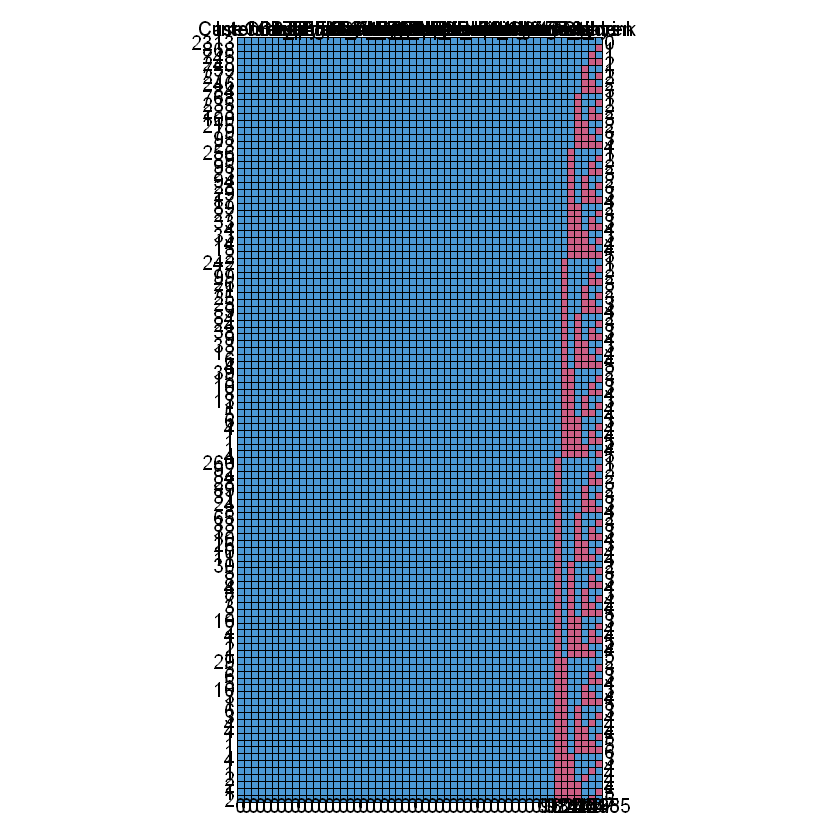

In [14]:
md.pattern(medical)

### After reviewing the output above, it seems that the distribution of where the missing data is located is mostly in the last columns of this dataset.

### Let's use the colnames(medical) code to look at all of the columns to see the placement of the missing data.

In [15]:
colnames(medical)

[1] "...1"               "CaseOrder"          "Customer_id"       
 [4] "Interaction"        "UID"                "City"              
 [7] "State"              "County"             "Zip"               
[10] "Lat"                "Lng"                "Population"        
[13] "Area"               "Timezone"           "Job"               
[16] "Children"           "Age"                "Education"         
[19] "Employment"         "Income"             "Marital"           
[22] "Gender"             "ReAdmis"            "VitD_levels"       
[25] "Doc_visits"         "Full_meals_eaten"   "VitD_supp"         
[28] "Soft_drink"         "Initial_admin"      "HighBlood"         
[31] "Stroke"             "Complication_risk"  "Overweight"        
[34] "Arthritis"          "Diabetes"           "Hyperlipidemia"    
[37] "BackPain"           "Anxiety"            "Allergic_rhinitis" 
[40] "Reflux_esophagitis" "Asthma"             "Services"          
[43] "Initial_days"       "TotalCharge"        "Additional_charges"
[46] "Item1"              "Item2"              "Item3"             
[49] "Item4"              "Item5"              "Item6"             
[52] "Item7"              "Item8"

### Now let's see the number of columns in the dataframe. 

In [16]:
ncol(medical)

[1] 53

### And the number of rows in the dataframe using the code nrow(medical).

In [17]:
nrow(medical)

[1] 10000

### Let's set these columns apart and rename them lastcolumns, then we'll check the number of columns again along with the data patterns. 

In [18]:
lastcolumns <- medical[20:53]


In [19]:
ncol(lastcolumns)

[1] 34

,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Initial_admin,HighBlood,Stroke,...,Item5,Item6,Item7,Item8,Overweight,Anxiety,Initial_days,Income,Soft_drink,
4184,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
1316,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,1
1330,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
448,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,2
461,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,1,1
155,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,1,0,2
169,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,1,2
63,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,0,0,0,3
427,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
172,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,0,2


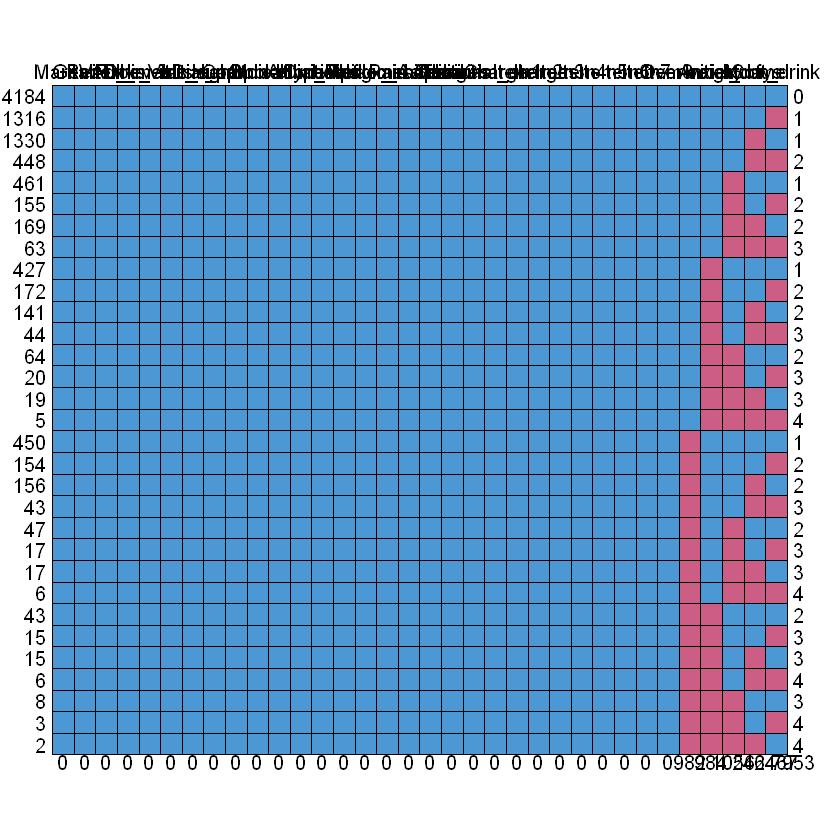

In [20]:
md.pattern(lastcolumns)

In [21]:
colnames(lastcolumns)

[1] "Income"             "Marital"            "Gender"            
 [4] "ReAdmis"            "VitD_levels"        "Doc_visits"        
 [7] "Full_meals_eaten"   "VitD_supp"          "Soft_drink"        
[10] "Initial_admin"      "HighBlood"          "Stroke"            
[13] "Complication_risk"  "Overweight"         "Arthritis"         
[16] "Diabetes"           "Hyperlipidemia"     "BackPain"          
[19] "Anxiety"            "Allergic_rhinitis"  "Reflux_esophagitis"
[22] "Asthma"             "Services"           "Initial_days"      
[25] "TotalCharge"        "Additional_charges" "Item1"             
[28] "Item2"              "Item3"              "Item4"             
[31] "Item5"              "Item6"              "Item7"             
[34] "Item8"

### We can see that the missing data is in the last columns as shown above. We will continue our cleaning process and will address those NAs at the end of the process. 

### 2- Convert categorical columns to numeric using the code medical$column <- as.numeric(medical$column). Referring to the str(medical) code above, we see that any chr data types are categorical. We will convert them to numeric next.

In [41]:
medical$Customer_id <- as.numeric(medical$Customer_id)

In [43]:
medical$Interaction <- as.numeric(medical$Interaction)

In [45]:
medical$UID <- as.numeric(medical$UID)

In [47]:
medical$City <- as.numeric(medical$City)

In [49]:
medical$State <- as.numeric(medical$State)

In [50]:
medical$County <- as.numeric(medical$County)

In [52]:
medical$Area <- as.numeric(medical$Area)

In [54]:
medical$Timezone <- as.numeric(medical$Timezone)

In [56]:
medical$Job <- as.numeric(medical$Job)

In [57]:
medical$Education <- as.numeric(medical$Education)

In [58]:
medical$Employment <- as.numeric(medical$Employment)

In [59]:
medical$Marital <- as.numeric(medical$Marital)

In [60]:
medical$Gender <- as.numeric(medical$Gender)

In [61]:
medical$ReAdmis <- as.numeric(medical$ReAdmis)

In [62]:
medical$Soft_drink <- as.numeric(medical$Soft_drink)

In [63]:
medical$Initial_admin <- as.numeric(medical$Initial_admin)

In [64]:
medical$HighBlood <- as.numeric(medical$HighBlood)

In [65]:
medical$Stroke <- as.numeric(medical$Stroke)

In [66]:
medical$Complication_risk <- as.numeric(medical$Complication_risk)

In [67]:
medical$Arthritis <- as.numeric(medical$Arthritis)

In [68]:
medical$Diabetes <- as.numeric(medical$Diabetes)

In [69]:
medical$Hyperlipidemia <- as.numeric(medical$Hyperlipidemia)

In [70]:
medical$BackPain <- as.numeric(medical$BackPain)

In [71]:
medical$Allergic_rhinitis <- as.numeric(medical$Allergic_rhinitis)

In [72]:
medical$Reflux_esophagitis <- as.numeric(medical$Reflux_esophagitis)

In [73]:
medical$Asthma <- as.numeric(medical$Asthma)

In [74]:
medical$Services <- as.numeric(medical$Services)

### Now, let's check to make sure that we converted everything correctly using str(medical).

In [75]:
str(medical)

spec_tbl_df [10,000 x 53] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1              : num [1:10000] 1 2 3 4 5 6 7 8 9 10 ...
 $ CaseOrder         : num [1:10000] 1 2 3 4 5 6 7 8 9 10 ...
 $ Customer_id       : num [1:10000] NA NA NA NA NA NA NA NA NA NA ...
 $ Interaction       : num [1:10000] NA NA NA NA NA NA NA NA NA NA ...
 $ UID               : num [1:10000] NA NA NA NA NA NA NA NA NA NA ...
 $ City              : num [1:10000] NA NA NA NA NA NA NA NA NA NA ...
 $ State             : num [1:10000] NA NA NA NA NA NA NA NA NA NA ...
 $ County            : num [1:10000] NA NA NA NA NA NA NA NA NA NA ...
 $ Zip               : num [1:10000] 35621 32446 57110 56072 23181 ...
 $ Lat               : num [1:10000] 34.3 30.8 43.5 43.9 37.6 ...
 $ Lng               : num [1:10000] -86.7 -85.2 -96.6 -93.5 -76.9 ...
 $ Population        : num [1:10000] 2951 11303 17125 2162 5287 ...
 $ Area              : num [1:10000] NA NA NA NA NA NA NA NA NA NA ...
 $ Timezone          : num [1:10000] 

### Excellent! We see that every chr (categorical) value is now num (numeric). 

### 3- Finding outliers visually
### I can now use plots to detect any outliers after checking the summary of the entire dataset. 
### I will first use the built-in summary(data) function to see what the data shows us and to see any anomalies, then will double check them with boxplots and distribution graphs by using the following code:
### boxplot(df$column) and normal probablity plots ggplot(df, aes(sample = column)) + geom_qq() ### + stat_qq().

In [47]:
summary(medical)

      ...1         CaseOrder      Customer_id     Interaction   
 Min.   :    1   Min.   :    1   Min.   : NA     Min.   : NA    
 1st Qu.: 2501   1st Qu.: 2501   1st Qu.: NA     1st Qu.: NA    
 Median : 5000   Median : 5000   Median : NA     Median : NA    
 Mean   : 5000   Mean   : 5000   Mean   :NaN     Mean   :NaN    
 3rd Qu.: 7500   3rd Qu.: 7500   3rd Qu.: NA     3rd Qu.: NA    
 Max.   :10000   Max.   :10000   Max.   : NA     Max.   : NA    
                                 NA's   :10000   NA's   :10000  
      UID             City           State           County     
 Min.   : NA     Min.   : NA     Min.   : NA     Min.   : NA    
 1st Qu.: NA     1st Qu.: NA     1st Qu.: NA     1st Qu.: NA    
 Median : NA     Median : NA     Median : NA     Median : NA    
 Mean   :NaN     Mean   :NaN     Mean   :NaN     Mean   :NaN    
 3rd Qu.: NA     3rd Qu.: NA     3rd Qu.: NA     3rd Qu.: NA    
 Max.   : NA     Max.   : NA     Max.   : NA     Max.   : NA    
 NA's   :10000   NA's   :

### Descriptive statistics 
We know that the `summary()` function automatically calculates the following summary statistics:
- Min: The minimum value
- 1st Qu: The value of the 1st quartile (25th percentile)
- Median: The median value
- 3rd Qu: The value of the 3rd quartile (75th percentile)
- Max: The maximum value

### Based on what the summary shows us above, let's now double-check for outliers using plots. 

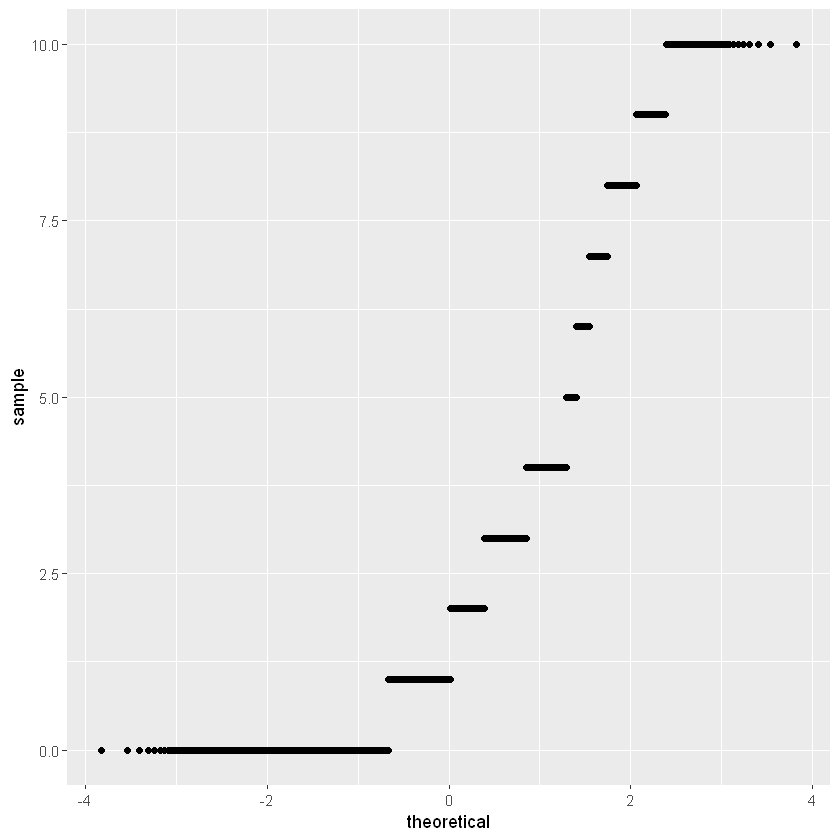

In [39]:
ggplot(medical, aes(sample = Children)) + geom_qq() + stat_qq()

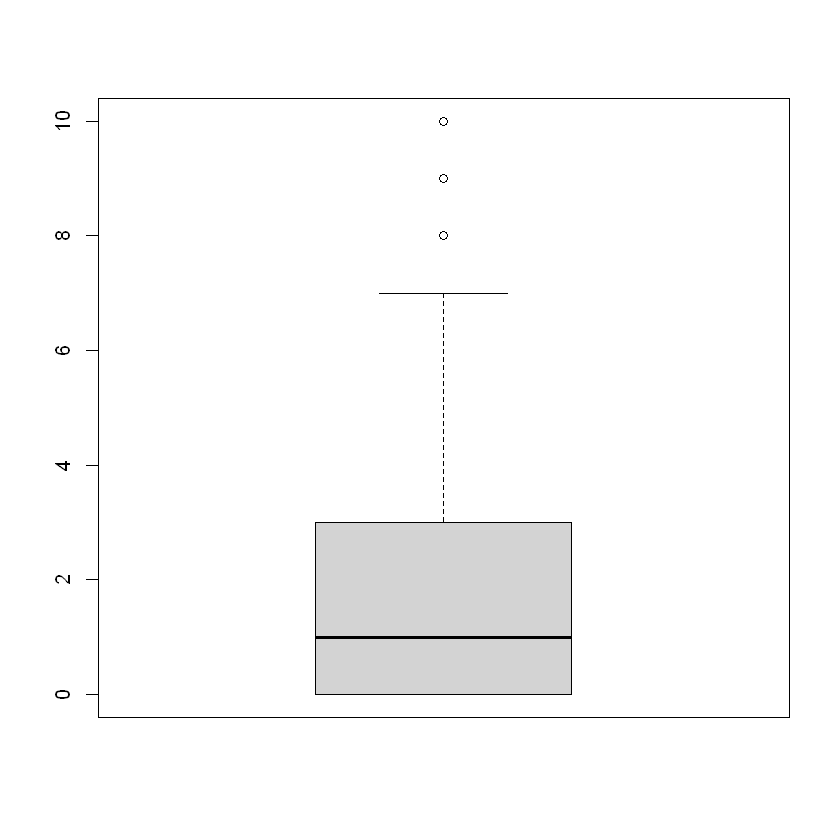

In [49]:
boxplot(medical$Children)

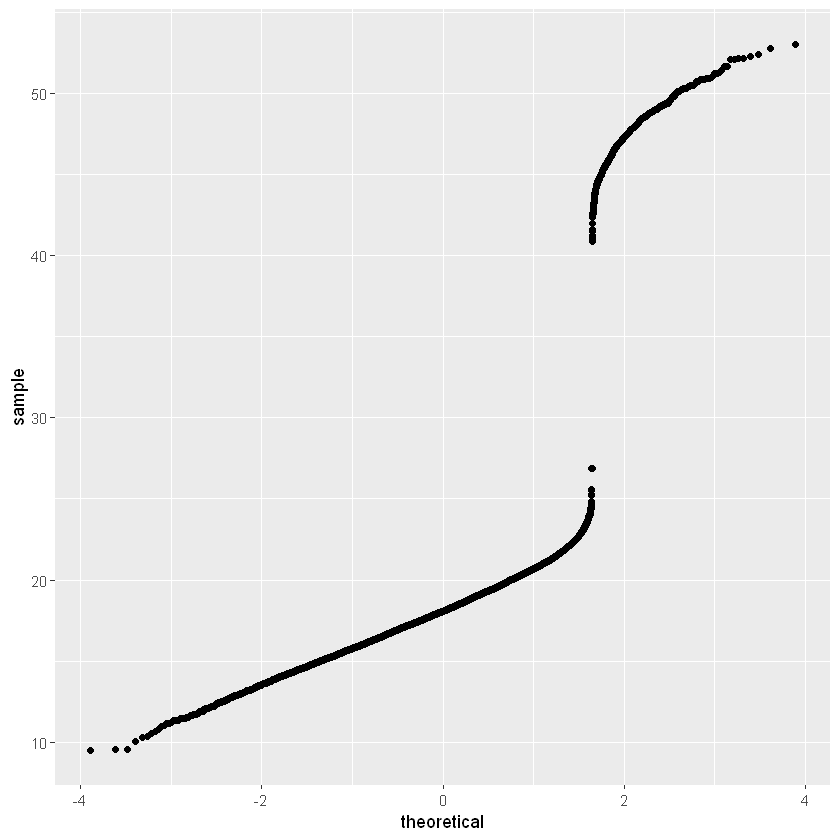

In [50]:
ggplot(medical, aes(sample = VitD_levels)) + geom_qq() + stat_qq()

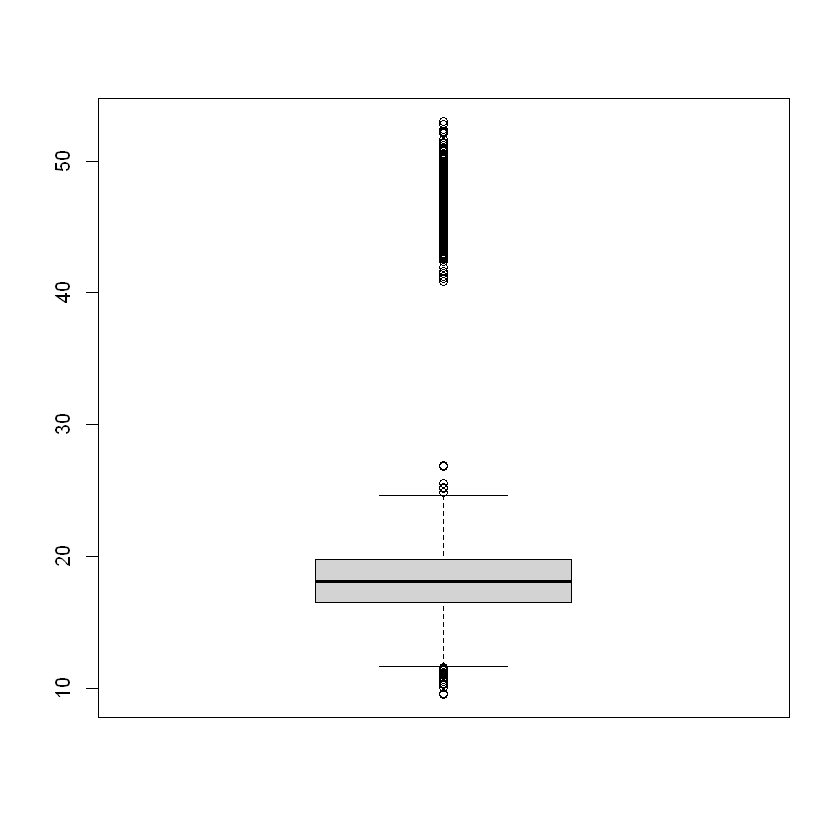

In [51]:
boxplot(medical$VitD_levels)

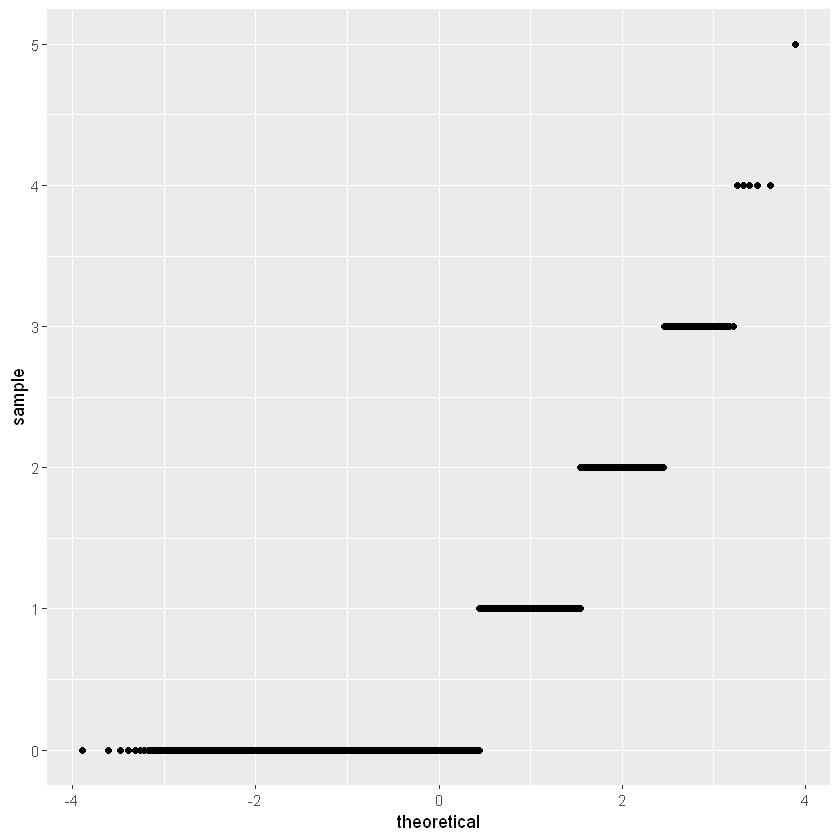

In [52]:
ggplot(medical, aes(sample = VitD_supp)) + geom_qq() + stat_qq()

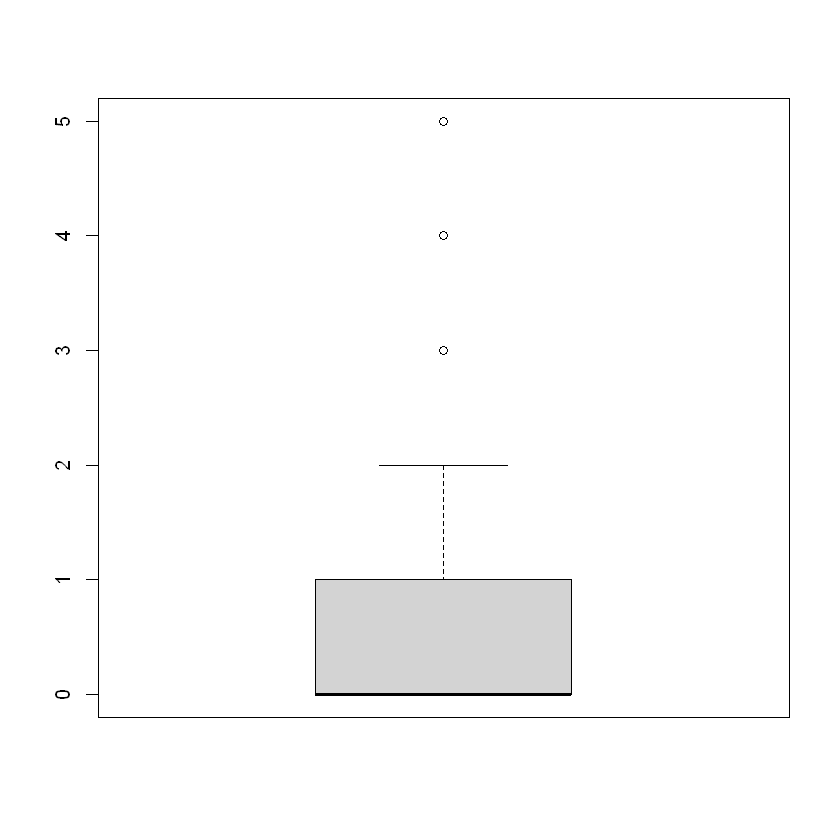

In [53]:
boxplot(medical$VitD_supp)

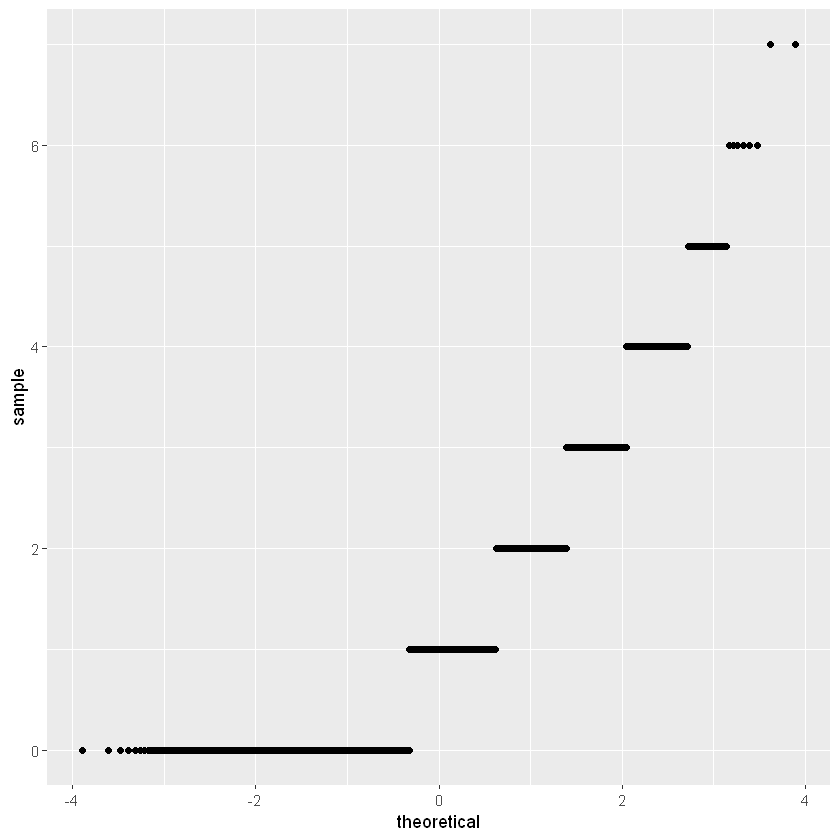

In [54]:
ggplot(medical, aes(sample = Full_meals_eaten)) + geom_qq() + stat_qq()

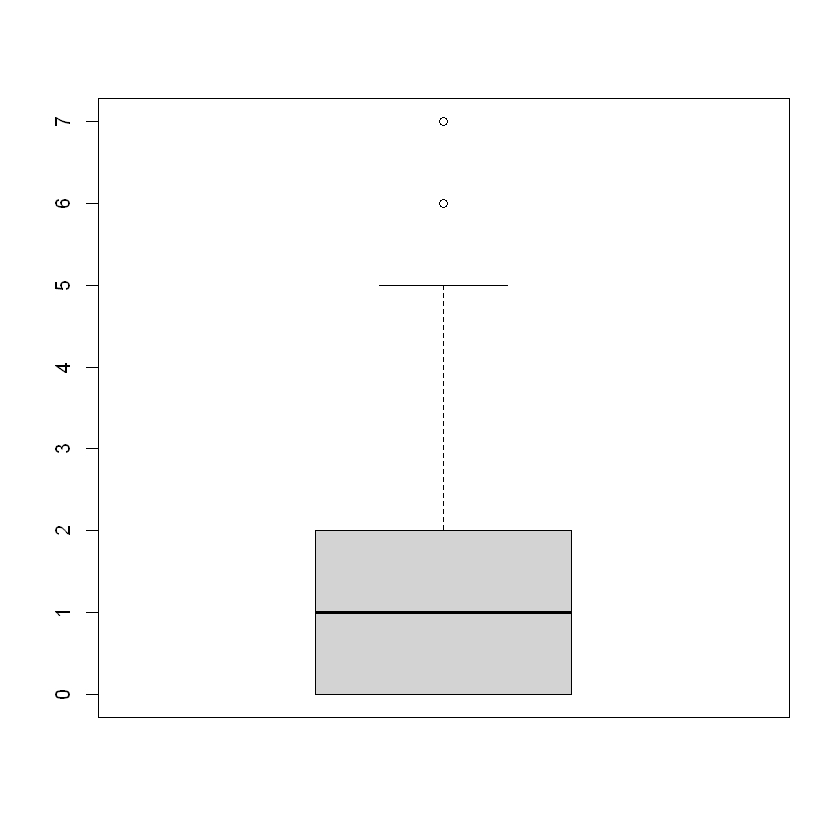

In [55]:
boxplot(medical$Full_meals_eaten)

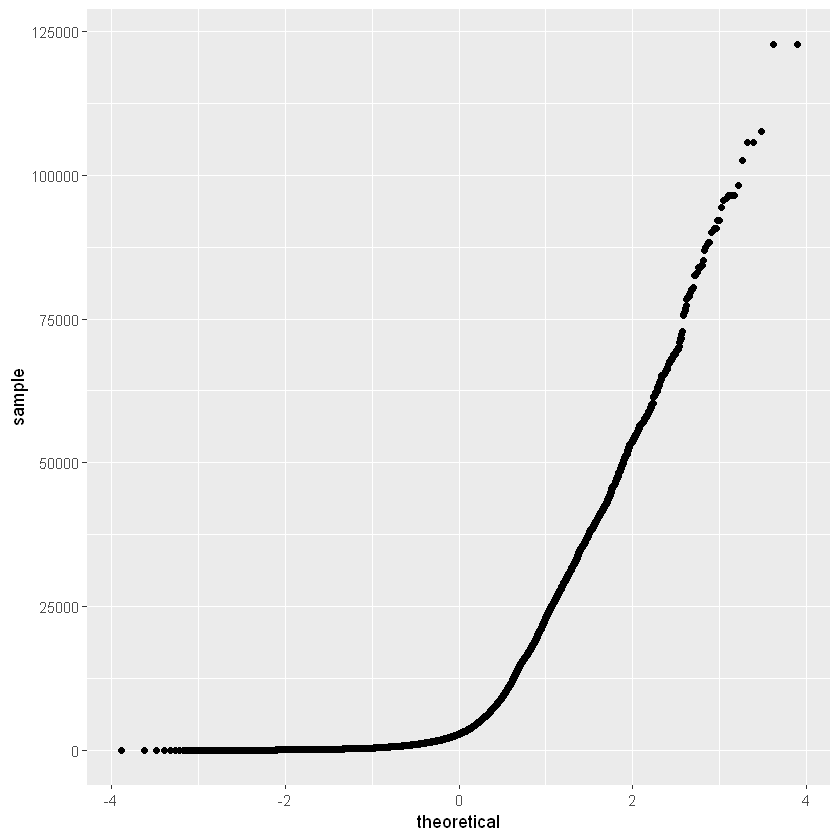

In [56]:
ggplot(medical, aes(sample = Population)) + geom_qq() + stat_qq()

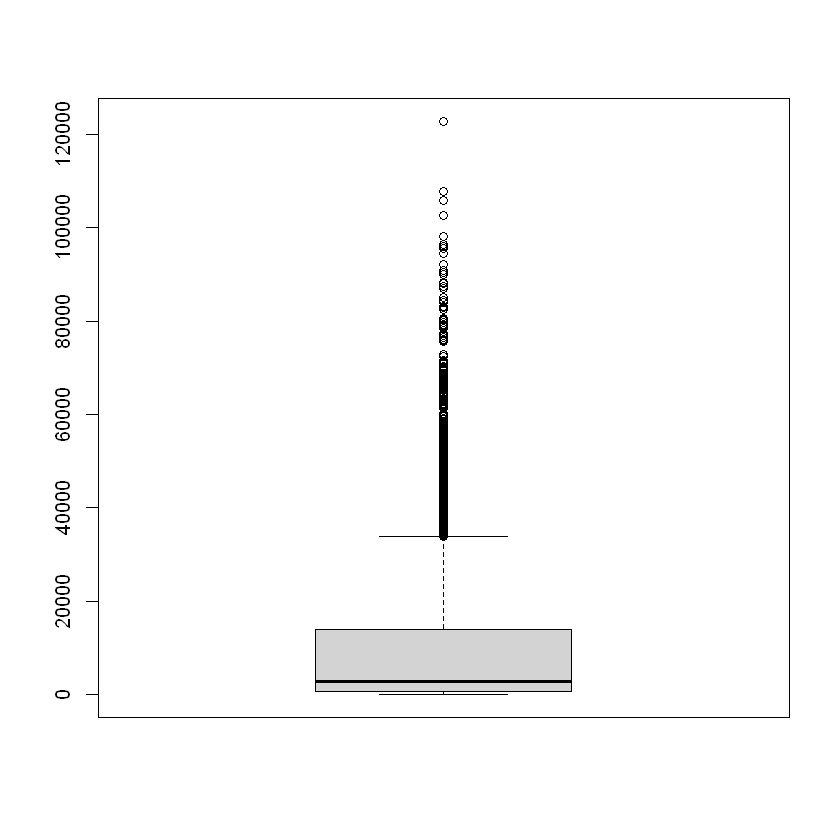

In [57]:
boxplot(medical$Population)

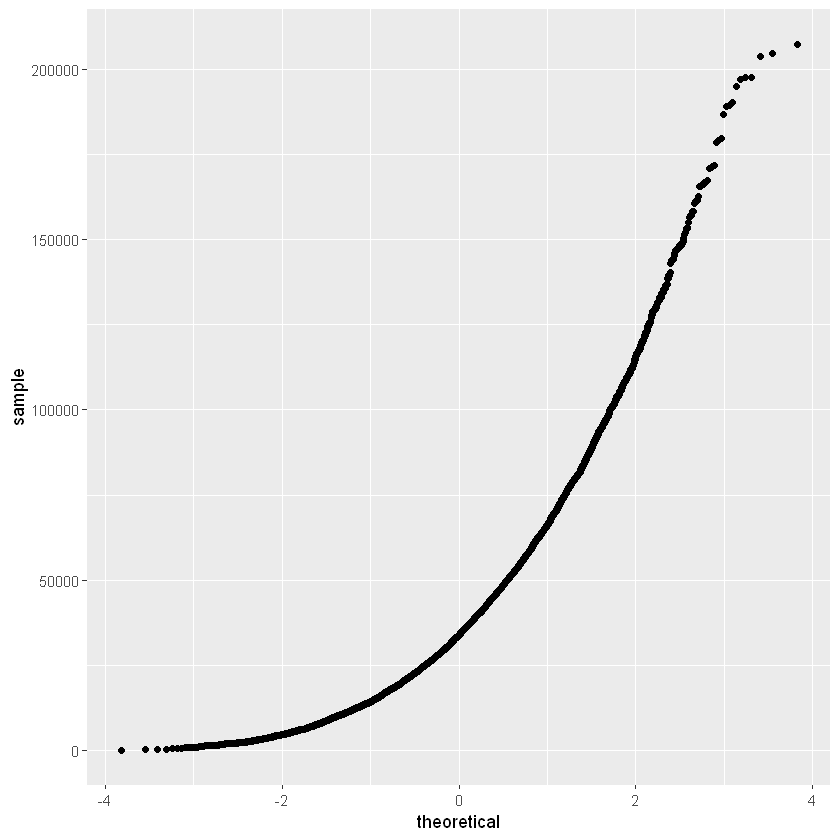

In [37]:
ggplot(medical, aes(sample = Income)) + geom_qq() + stat_qq()

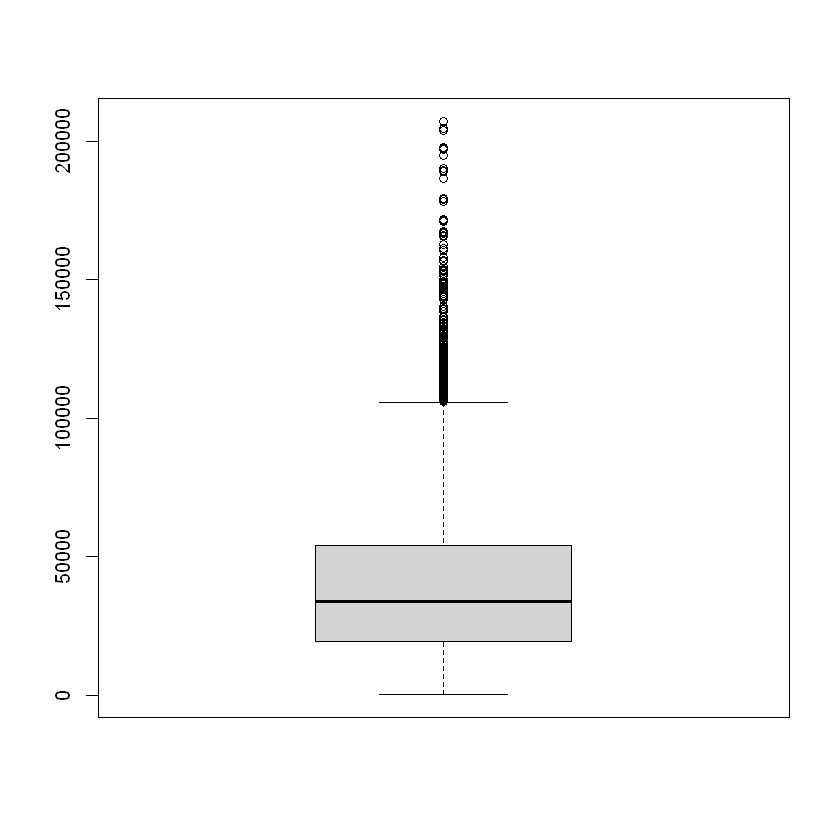

In [59]:
boxplot(medical$Income)

### The results for number 3 show that the following columns had outliers confirmed by plots above: children, vitamin D levels, vitamin D supplements, full meals eaten, population, and income.

### 4- So what does all of this mean? I will need to impute/mitigate the missing NAs because removing them based on our results found above could severely skew the data. 

In [60]:
medical$Children[is.na(medical$Children)]<-median(medical$Children, na.rm=TRUE)

In [61]:
medical$Age[is.na(medical$Age)]<-median(medical$Age, na.rm=TRUE)

In [62]:
medical$Income[is.na(medical$Income)]<-median(medical$Income, na.rm=TRUE)

In [63]:
medical$Overweight[is.na(medical$Overweight)]<-median(medical$Overweight, na.rm=TRUE)

In [64]:
medical$Anxiety[is.na(medical$Anxiety)]<-median(medical$Anxiety, na.rm=TRUE)

In [65]:
medical$Soft_drink[is.na(medical$Soft_drink)]<-median(medical$Soft_drink, na.rm = TRUE)

#### The data is now clean. We can now proceed to the PCA. 

## Part 3- E: Principal Component Analysis (PCA)
## The PCA is a method for creating related groupings of variables.

### I need to load in some more packages to do the PCA.

In [77]:
install.packages("FactoMineR")


In [35]:
library("FactoMineR")

### Standardization

In [79]:
medical_sub <- scale(x = medical[,c(16, 17, 33)])
head(medical_sub)

Children,Age,Overweight
-0.5095136,-0.0143121,-1.5613384
0.4183770,-0.1111214,0.6404051
0.4183770,-0.0143121,0.6404051
-0.9734589,1.1958036,-1.5613384
NA,-1.5148555,-1.5613384
NA,1.0989943,0.6404051


### PCA

In [80]:
medical_sub.pca <- PCA(medical_sub, scale.unit=TRUE, graph=F)

### Scree Plot

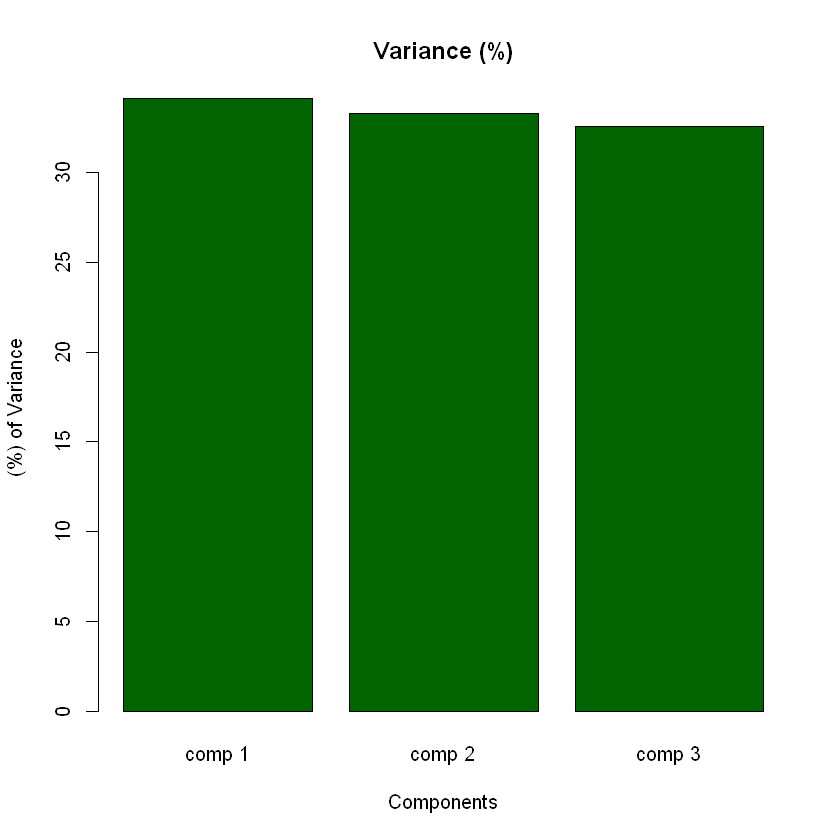

In [81]:
eig.val <- medical_sub.pca$eig

barplot(eig.val[, 2],

        main = "Variance (%)",

        xlab = "Components",

        ylab = "(%) of Variance",

        col = "darkgreen")

### PCA graph of variables

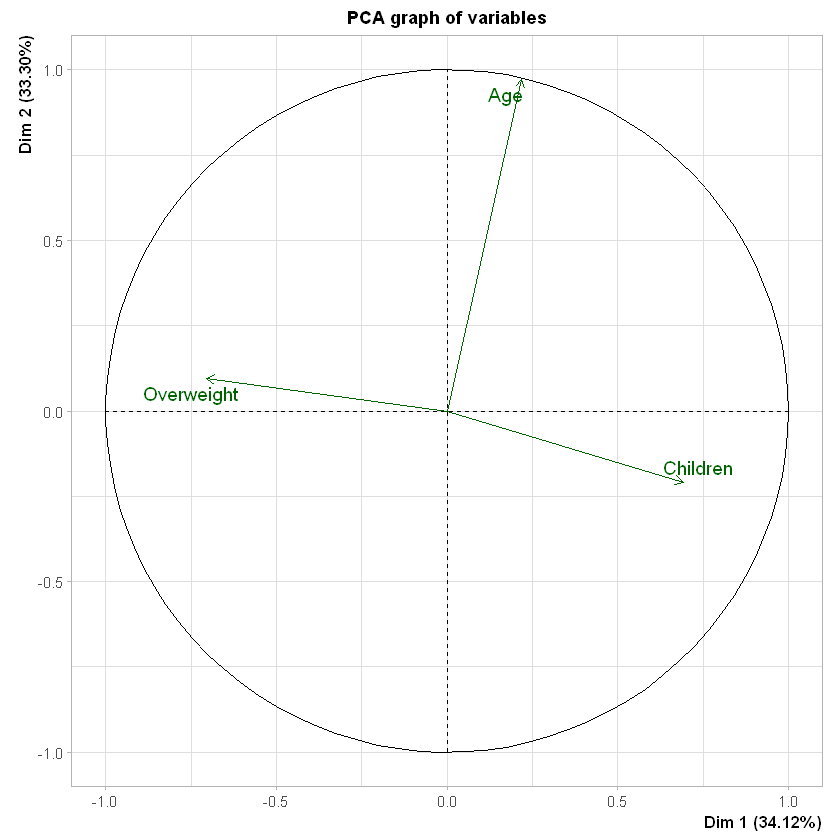

In [82]:
plot(medical_sub.pca, choix = "var", autoLab = "auto", col.var="darkgreen", label="var", graph.type = "ggplot", select="cos2 0.40")

### According to the above graph, the three variables that make up my research question don't appear to be correlated. 

### Wonderful! All we need to finish now is writing the clean data to CSV with the code write.csv(medical,"C:\\Users\\Jilian\\Desktop\\medical.csv", row.names = TRUE)

In [28]:
write.csv(medical, "C:\\Users\\Jilian\\Desktop\\medical.csv", row.names = TRUE)

In [29]:
medical

...1,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,...,3191.049,17939.403,3,3,2,2,4,3,3,4
2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,...,4214.905,17612.998,3,4,3,4,4,4,3,3
3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,...,2177.587,17505.192,2,4,4,4,3,4,3,3
4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,...,2465.119,12993.437,3,5,5,3,4,5,5,5
5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,...,1885.655,3716.526,2,1,3,3,5,3,4,3
6,6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,...,2774.090,12742.590,4,5,4,4,3,5,4,6
7,7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,...,3533.292,16815.514,4,3,3,2,3,4,5,5
8,8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,...,3316.400,6930.572,1,2,2,5,4,2,4,2
9,9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,...,2922.760,8363.187,3,3,2,3,3,3,4,2


#### To clear warning messages, use this code: options(warn = - 1)        

In [85]:
options(warn = - 1)        